<a href="https://colab.research.google.com/github/ChonChanokAng/BSC_DPDM23/blob/main/midterm_bscdpdm23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

เตรียมข้อมูลอุตุนิยมวิทยา (https://drive.google.com/drive/folders/1k6tJcTTv2bKmFz6A5oOWi-sAeTVIQpG4?usp=sharing)

ให้เตรียมข้อมูลลักษณะอากาศของแต่ละวัน (แก้ missing, noise, ฯลฯ ) และสร้างตารางเพื่อทำการทำนาย ปริมาณน้ำฝนสำหรับจังหวัดขอนแก่นของวันถัดไป (ปริมาณน้ำฝนขอนแก่นของวันที่ D+1) จากข้อมูลลักษณะอากาศในจังหวัดต่างๆ (ขอนแก่น,หนองคาย,นครพนม,เลย,สกลนคร) ของวันปัจจุบัน (อุณหภูมิตุ้มแห้งขอนแก่นของวันที่ D,...,ความเร็วลมสกลนครของวันที่ D)


ตัวอย่างตารางที่ต้องการ (Xi มีทั้งหมด 5จังหวัด * 8ลักษณะอากาศ = 40 columns และ Y อีก 1 columns)

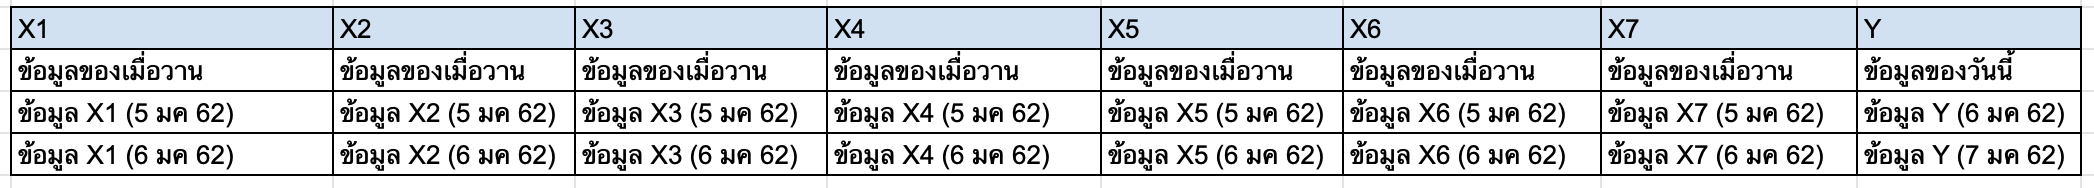

In [331]:
import pandas as pd
import numpy as np

In [332]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##ความกด(เปอร์เซ็นต์)

In [333]:
press_KKN= pd.read_excel('/content/drive/MyDrive/BSC_dpdm23_data/ความกด(เปอร์เซ็นต์)/จ.ขอนแก่น.xlsx',header=4)
press_NPM = pd.read_excel('/content/drive/MyDrive/BSC_dpdm23_data/ความกด(เปอร์เซ็นต์)/จ.นครพนม.xlsx',header=4)
press_SNK = pd.read_excel('/content/drive/MyDrive/BSC_dpdm23_data/ความกด(เปอร์เซ็นต์)/จ.สกลนคร.xlsx',header=4)
press_NKI = pd.read_excel('/content/drive/MyDrive/BSC_dpdm23_data/ความกด(เปอร์เซ็นต์)/จ.หนองคาย.xlsx',header=4)
press_LEI = pd.read_excel('/content/drive/MyDrive/BSC_dpdm23_data/ความกด(เปอร์เซ็นต์)/จ.เลย.xlsx',header=4)

####แก้ไขค่า missing

In [334]:
#ทำให้ (-) เป็นค่า missing
press_KKN = press_KKN.replace('-', np.nan)
press_NPM = press_NPM.replace('-', np.nan)
press_SNK = press_SNK.replace('-', np.nan)
press_NKI = press_NKI.replace('-', np.nan)
press_LEI = press_LEI.replace('-', np.nan)

In [131]:
#ตรวจสอบ missing
press_KKN.isnull().any()

Unnamed: 0     False
Unnamed: 1     False
Unnamed: 2     False
1              False
2              False
3              False
4              False
5              False
6              False
7              False
8              False
9              False
10             False
11             False
12             False
13             False
14             False
15             False
16             False
17             False
18             False
19             False
20             False
21             False
22             False
23             False
24             False
25             False
26             False
27             False
28             False
29              True
30              True
31              True
Unnamed: 34    False
dtype: bool

In [132]:
press_NPM.isnull().any()

Unnamed: 0     False
Unnamed: 1     False
Unnamed: 2     False
1              False
2              False
3              False
4              False
5              False
6              False
7              False
8              False
9              False
10             False
11             False
12             False
13             False
14             False
15             False
16             False
17             False
18             False
19             False
20             False
21             False
22             False
23             False
24             False
25             False
26             False
27             False
28             False
29              True
30              True
31              True
Unnamed: 34    False
dtype: bool

In [133]:
press_SNK.isnull().any()

Unnamed: 0     False
Unnamed: 1     False
Unnamed: 2     False
1              False
2              False
3              False
4              False
5              False
6              False
7              False
8              False
9              False
10             False
11             False
12             False
13             False
14             False
15             False
16             False
17             False
18             False
19             False
20             False
21             False
22             False
23             False
24             False
25             False
26             False
27             False
28             False
29              True
30              True
31              True
Unnamed: 34    False
dtype: bool

In [134]:
press_NKI.isnull().any()

Unnamed: 0     False
Unnamed: 1     False
Unnamed: 2     False
1              False
2              False
3              False
4              False
5              False
6              False
7              False
8              False
9              False
10             False
11             False
12             False
13             False
14             False
15             False
16             False
17             False
18             False
19             False
20             False
21             False
22             False
23             False
24             False
25             False
26             False
27             False
28             False
29              True
30              True
31              True
Unnamed: 34    False
dtype: bool

In [135]:
press_LEI.isnull().any()

Unnamed: 0     False
Unnamed: 1     False
Unnamed: 2     False
1              False
2              False
3              False
4              False
5              False
6              False
7              False
8              False
9              False
10             False
11             False
12             False
13             False
14             False
15             False
16             False
17             False
18             False
19             False
20             False
21             False
22             False
23             False
24             False
25             False
26             False
27             False
28             False
29              True
30              True
31              True
Unnamed: 34    False
dtype: bool

In [136]:
#เปลี่ยนชื่อ column
press_KKN.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'ค่าเฉลี่ย'},inplace=True)
press_NPM.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'ค่าเฉลี่ย'},inplace=True)
press_SNK.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'ค่าเฉลี่ย'},inplace=True)
press_NKI.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'ค่าเฉลี่ย'},inplace=True)
press_LEI.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'ค่าเฉลี่ย'},inplace=True)

In [137]:
press_KKN.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.47,1006.65,1007.49,1008.28,1009.88,1011.36,1011.17,...,1010.76,1010.23,1011.34,1011.84,1011.89,1012.29,1011.67,1011.30,1011.52,1010.350645
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1011.79,1010.83,1010.74,1010.71,1010.09,1009.24,1008.03,...,1014.07,1015.40,1013.95,1012.35,1011.31,1009.59,1010.13,1010.47,NaN,1011.717000
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1011.43,1012.57,1012.28,1012.97,1013.09,1012.03,1012.05,...,1012.88,1015.78,1018.56,1018.65,1016.88,1016.05,1014.98,1015.53,1016.40,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1015.67,1014.11,1012.91,1014.06,1015.51,1015.88,1017.72,...,1010.91,1011.27,1011.65,1012.56,1010.76,1010.26,1010.69,1012.34,1014.52,1012.484516
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.26,1012.92,1013.61,1013.18,1011.26,1008.80,1008.16,...,1005.75,1005.46,1004.80,1005.08,1006.57,1005.96,1006.53,1010.47,NaN,1009.749667


In [138]:
press_NPM.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1006.30,1007.38,1008.07,1008.44,1010.51,1011.65,1011.24,...,1011.09,1010.64,1012.01,1012.47,1012.46,1012.85,1012.43,1011.69,1012.28,1010.754839
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.28,1011.23,1011.08,1010.96,1010.57,1009.20,1007.99,...,1015.49,1016.09,1014.62,1012.80,1011.83,1010.00,1010.60,1011.13,NaN,1012.184667
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1012.15,1013.75,1013.24,1013.94,1013.35,1012.62,1012.48,...,1014.23,1017.58,1019.77,1019.71,1017.34,1017.01,1015.64,1016.89,1017.73,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1016.56,1014.88,1013.41,1015.85,1016.94,1017.13,1019.21,...,1013.13,1012.45,1013.59,1013.15,1011.56,1010.71,1011.95,1013.77,1015.50,1013.510000
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.98,1013.75,1014.96,1013.52,1011.85,1008.82,1008.15,...,1005.76,1005.13,1004.94,1006.42,1008.93,1007.88,1007.29,1011.13,NaN,1010.608000


In [139]:
press_SNK.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.84,1007.16,1007.87,1008.56,1010.55,1011.83,1011.24,...,1011.24,1010.80,1012.02,1012.36,1012.42,1012.97,1012.52,1011.87,1012.21,1010.772258
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.41,1011.47,1011.22,1011.16,1010.51,1009.26,1008.20,...,1015.21,1016.11,1014.65,1012.96,1011.91,1010.10,1010.78,1011.06,NaN,1012.255000
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1012.16,1013.74,1013.44,1014.00,1013.28,1012.69,1012.57,...,1014.22,1017.34,1019.63,1019.96,1017.56,1017.02,1015.80,1016.96,1017.63,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1016.61,1014.92,1013.86,1015.71,1016.87,1017.17,1018.83,...,1012.80,1012.37,1013.47,1013.39,1011.36,1010.64,1011.95,1013.86,1015.52,1013.485484
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1014.05,1013.71,1014.95,1013.68,1011.72,1008.93,1008.08,...,1005.73,1005.04,1004.96,1005.94,1008.70,1007.38,1007.25,1011.06,NaN,1010.554000


In [140]:
press_NKI.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.34,1006.67,1007.39,1008.11,1009.69,1011.55,1011.28,...,1011.01,1010.71,1011.67,1012.36,1012.50,1012.81,1011.88,1011.77,1012.18,1010.580645
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.05,1011.35,1011.28,1011.27,1010.62,1009.58,1008.55,...,1015.27,1016.46,1014.65,1013.08,1011.62,1010.21,1010.71,1011.10,NaN,1012.332333
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1012.16,1013.26,1012.40,1013.57,1013.68,1012.72,1012.44,...,1013.94,1016.92,1019.05,1019.88,1017.86,1016.76,1015.63,1016.31,1017.19,1015.468065
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1016.26,1014.60,1012.83,1014.85,1016.69,1016.56,1018.50,...,1011.56,1011.98,1012.20,1012.95,1011.23,1010.63,1010.96,1013.16,1015.38,1013.062903
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.64,1013.36,1014.86,1013.93,1011.87,1008.77,1008.42,...,1005.89,1005.54,1005.28,1005.32,1007.59,1006.66,1007.07,1011.10,NaN,1010.214667


In [141]:
press_LEI.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.12,1006.51,1007.81,1008.15,1009.21,1011.28,1011.22,...,1010.79,1010.25,1011.52,1012.04,1012.00,1012.74,1011.69,1011.27,1011.71,1010.343871
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.09,1011.32,1010.99,1011.47,1010.88,1009.62,1008.28,...,1014.79,1015.74,1014.36,1013.30,1011.92,1009.86,1010.10,1010.43,NaN,1012.078333
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1010.43,1011.81,1012.45,1012.03,1013.29,1013.21,1012.81,...,1013.75,1013.11,1015.95,1018.79,1019.39,1017.88,1016.49,1014.97,1015.62,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1015.42,1014.07,1012.35,1013.49,1014.99,1015.70,1017.24,...,1010.10,1010.76,1011.11,1011.72,1010.91,1010.31,1010.16,1012.61,1014.40,1012.367419
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.19,1012.82,1013.94,1013.18,1010.99,1008.58,1008.19,...,1005.78,1005.48,1004.96,1005.05,1006.27,1005.59,1006.52,1010.43,NaN,1009.516667


In [142]:
#แทนค่า mean ลงไปใน missing
for i in range(len(press_KKN['ที่'])):press_KKN.iloc[i,:]=press_KKN.iloc[i,:].fillna(press_KKN.iloc[i]['ค่าเฉลี่ย'])
for i in range(len(press_NPM['ที่'])):press_NPM.iloc[i,:]=press_NPM.iloc[i,:].fillna(press_NPM.iloc[i]['ค่าเฉลี่ย'])
for i in range(len(press_SNK['ที่'])):press_SNK.iloc[i,:]=press_SNK.iloc[i,:].fillna(press_SNK.iloc[i]['ค่าเฉลี่ย'])
for i in range(len(press_NKI['ที่'])):press_NKI.iloc[i,:]=press_NKI.iloc[i,:].fillna(press_NKI.iloc[i]['ค่าเฉลี่ย'])
for i in range(len(press_LEI['ที่'])):press_LEI.iloc[i,:]=press_LEI.iloc[i,:].fillna(press_LEI.iloc[i]['ค่าเฉลี่ย'])

In [146]:
#ตรวจสอบ missing
press_KKN.isnull().any()

ที่             False
สถานี           False
ปี/เดือน/วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29              False
30              False
31              False
ค่าเฉลี่ย       False
dtype: bool

In [147]:
press_NPM.isnull().any()

ที่             False
สถานี           False
ปี/เดือน/วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29              False
30              False
31              False
ค่าเฉลี่ย       False
dtype: bool

In [148]:
press_SNK.isnull().any()

ที่             False
สถานี           False
ปี/เดือน/วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29              False
30              False
31              False
ค่าเฉลี่ย       False
dtype: bool

In [149]:
press_NKI.isnull().any()

ที่             False
สถานี           False
ปี/เดือน/วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29              False
30              False
31              False
ค่าเฉลี่ย       False
dtype: bool

In [150]:
press_LEI.isnull().any()

ที่             False
สถานี           False
ปี/เดือน/วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29              False
30              False
31              False
ค่าเฉลี่ย       False
dtype: bool

##ความชื้นสัมพัทธ์(เปอร์เซ็นต์)

In [151]:
rh_KKN= pd.read_excel('/content/drive/MyDrive/BSC_dpdm23_data/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.ขอนแก่น.xlsx',header=4)
rh_NPM = pd.read_excel('/content/drive/MyDrive/BSC_dpdm23_data/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.นครพนม.xlsx',header=4)
rh_SNK = pd.read_excel('/content/drive/MyDrive/BSC_dpdm23_data/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.สกลนคร.xlsx',header=4)
rh_NKI = pd.read_excel('/content/drive/MyDrive/BSC_dpdm23_data/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.หนองคาย.xlsx',header=4)
rh_LEI = pd.read_excel('/content/drive/MyDrive/BSC_dpdm23_data/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.เลย.xlsx',header=4)

####แก้ไขค่า missing

In [152]:
#ทำให้ (-) เป็นค่า missing
rh_KKN = rh_KKN.replace('-', np.nan)
rh_NPM = rh_NPM.replace('-', np.nan)
rh_SNK = rh_SNK.replace('-', np.nan)
rh_NKI = rh_NKI.replace('-', np.nan)
rh_LEI = rh_LEI.replace('-', np.nan)

In [153]:
#เปลี่ยนชื่อ column
rh_KKN.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'ค่าเฉลี่ย'},inplace=True)
rh_NPM.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'ค่าเฉลี่ย'},inplace=True)
rh_SNK.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'ค่าเฉลี่ย'},inplace=True)
rh_NKI.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'ค่าเฉลี่ย'},inplace=True)
rh_LEI.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'ค่าเฉลี่ย'},inplace=True)

In [154]:
#แทนค่า mean ลงไปใน missing
for i in range(len(rh_KKN['ที่'])):rh_KKN.iloc[i,:]=rh_KKN.iloc[i,:].fillna(rh_KKN.iloc[i]['ค่าเฉลี่ย'])
for i in range(len(rh_NPM['ที่'])):rh_NPM.iloc[i,:]=rh_NPM.iloc[i,:].fillna(rh_NPM.iloc[i]['ค่าเฉลี่ย'])
for i in range(len(rh_SNK['ที่'])):rh_SNK.iloc[i,:]=rh_SNK.iloc[i,:].fillna(rh_SNK.iloc[i]['ค่าเฉลี่ย'])
for i in range(len(rh_NKI['ที่'])):rh_NKI.iloc[i,:]=rh_NKI.iloc[i,:].fillna(rh_NKI.iloc[i]['ค่าเฉลี่ย'])
for i in range(len(rh_LEI['ที่'])):rh_LEI.iloc[i,:]=rh_LEI.iloc[i,:].fillna(rh_LEI.iloc[i]['ค่าเฉลี่ย'])

In [156]:
rh_KKN.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,83,92,86,80,86,86,83,...,73,72,73,69,69,75,71.0,71.0,68.0,79
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,71,65,68,65,65,68,69,...,65,66,65,67,68,67,67.0,65.0,68.0,68
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,66,61,61,62,61,60,69,...,63,62,60,60,62,65,66.0,63.0,64.0,63
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,65,66,69,63,64,68,65,...,80,74,75,71,75,69,70.0,67.0,68.0,69
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,71,72,71,72,70,68,61,...,58,53,48,57,71,73,68.0,65.0,65.0,65


In [157]:
rh_NPM.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,357201-นครพนม จ.นครพนม,2011-10-01,95,84,74,72,87,88,81,...,66,67,70,69,71,66,72.0,70.0,69.0,77
1,2,357201-นครพนม จ.นครพนม,2011-11-01,69,67,70,68,71,68,73,...,66,66,70,78,74,69,66.0,65.0,69.0,69
2,3,357201-นครพนม จ.นครพนม,2011-12-01,64,56,62,67,69,77,73,...,66,54,60,61,70,71,63.0,66.0,70.0,65
3,1,357201-นครพนม จ.นครพนม,2012-01-01,71,70,64,59,68,69,66,...,73,74,62,67,74,71,61.0,59.0,62.0,71
4,2,357201-นครพนม จ.นครพนม,2012-02-01,68,69,66,71,71,71,64,...,63,61,64,64,68,76,69.0,65.0,65.0,65


In [158]:
rh_SNK.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,87,88,77,75,87,86,81,...,74,73,73,72,72,70,74.0,73.0,72.0,78
1,2,356201-สกลนคร จ.สกลนคร,2011-11-01,71,71,71,72,73,70,75,...,68,66,71,71,70,70,69.0,69.0,70.0,70
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,66,61,64,67,70,73,72,...,69,65,64,62,69,69,69.0,69.0,68.0,6
3,1,356201-สกลนคร จ.สกลนคร,2012-01-01,67,69,66,63,65,67,65,...,75,72,67,72,73,71,64.0,64.0,62.0,72
4,2,356201-สกลนคร จ.สกลนคร,2012-02-01,66,70,67,69,73,64,60,...,55,53,55,64,69,74,71.0,64.0,64.0,64


In [159]:
rh_NKI.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,89,91,78,75,90,88,87,...,76,73,68,71,70,71,70.0,66.0,68.0,76
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,68,66,66,67,68,69,68,...,60,64,65,67,68,69,71.0,69.0,68.0,68
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,67,62,66,66,65,68,71,...,65,56,61,58,67,71,70.0,67.0,68.0,65
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,67,70,68,65,73,68,66,...,81,71,71,68,71,69,65.0,68.0,73.0,70
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,68,71,91,79,78,71,67,...,63,63,61,62,69,76,69.0,69.0,69.0,69


In [160]:
rh_LEI.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,90,95,92,89,86,94,90,...,85,86,83,84,85,85,82.0,83.0,85.0,87
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,85,83,84,83,83,85,83,...,73,77,80,81,80,84,82.0,79.0,82.0,82
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,80,77,77,76,78,83,82,...,80,74,75,74,80,80,78.0,81.0,78.0,77
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,75,78,81,79,73,77,82,...,83,80,83,79,80,78,77.0,82.0,79.0,78
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,79,81,91,84,78,73,69,...,67,68,68,67,76,73,70.0,73.0,73.0,73


##ความเร็วลม(นอต)

In [161]:
ws_KKN = pd.read_excel('/content/drive/MyDrive/BSC_dpdm23_data/ความเร็วลม(นอต)/จ.ขอนแก่น.xlsx',header=4)
ws_NPM = pd.read_excel('/content/drive/MyDrive/BSC_dpdm23_data/ความเร็วลม(นอต)/จ.นครพนม.xlsx',header=4)
ws_SNK = pd.read_excel('/content/drive/MyDrive/BSC_dpdm23_data/ความเร็วลม(นอต)/จ.สกลนคร.xlsx',header=4)
ws_NKI = pd.read_excel('/content/drive/MyDrive/BSC_dpdm23_data/ความเร็วลม(นอต)/จ.หนองคาย.xlsx',header=4)
ws_LEI = pd.read_excel('/content/drive/MyDrive/BSC_dpdm23_data/ความเร็วลม(นอต)/จ.เลย.xlsx',header=4)

####แก้ไขค่า missing

In [162]:
#ทำให้ (-) เป็นค่า missing
ws_KKN = ws_KKN.replace('-', np.nan)
ws_NPM = ws_NPM.replace('-', np.nan)
ws_SNK = ws_SNK.replace('-', np.nan)
ws_NKI = ws_NKI.replace('-', np.nan)
ws_LEI = ws_LEI.replace('-', np.nan)

In [163]:
#เปลี่ยนชื่อ column
ws_KKN.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'ค่าเฉลี่ย'},inplace=True)
ws_NPM.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'ค่าเฉลี่ย'},inplace=True)
ws_SNK.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'ค่าเฉลี่ย'},inplace=True)
ws_NKI.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'ค่าเฉลี่ย'},inplace=True)
ws_LEI.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'ค่าเฉลี่ย'},inplace=True)

In [164]:
#แทนค่า mean ลงไปใน missing
for i in range(len(ws_KKN['ที่'])):ws_KKN.iloc[i,:]=ws_KKN.iloc[i,:].fillna(ws_KKN.iloc[i]['ค่าเฉลี่ย'])
for i in range(len(ws_NPM['ที่'])):ws_NPM.iloc[i,:]=ws_NPM.iloc[i,:].fillna(ws_NPM.iloc[i]['ค่าเฉลี่ย'])
for i in range(len(ws_SNK['ที่'])):ws_SNK.iloc[i,:]=ws_SNK.iloc[i,:].fillna(ws_SNK.iloc[i]['ค่าเฉลี่ย'])
for i in range(len(ws_NKI['ที่'])):ws_NKI.iloc[i,:]=ws_NKI.iloc[i,:].fillna(ws_NKI.iloc[i]['ค่าเฉลี่ย'])
for i in range(len(ws_LEI['ที่'])):ws_LEI.iloc[i,:]=ws_LEI.iloc[i,:].fillna(ws_LEI.iloc[i]['ค่าเฉลี่ย'])

In [166]:
ws_KKN.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,3,2,3.0,2,2,3,4,...,2,3,5,5,5,4,6.0,4.0,5.000000,3.354839
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,4,5,3.0,3,5,2,3,...,7,6,5,5,3,1,3.0,3.0,3.466667,3.466667
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,3,4,4.0,4,4,4,4,...,5,6,7,6,5,4,4.0,6.0,5.000000,4.806452
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,4,2,1.0,4,4,2,4,...,3,3,4,2,2,1,3.0,4.0,4.000000,3.129032
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,2,2,3.0,2,3,1,2,...,1,2,3,2,4,3,3.0,3.0,2.566667,2.566667


In [167]:
ws_NPM.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,1,1,2,2.0,1.0,0,2.0,...,1,2.0,2.0,1,2,2.0,1.0,1.0,1.0,1.322581
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,1,1,1,1.0,1.0,1,1.0,...,3,3.0,2.0,2,1,1.0,1.0,1.0,1.2,1.200000
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1,2,2,1.0,1.0,1,1.0,...,1,3.0,3.0,1,2,1.0,1.0,2.0,2.0,1.741935
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,2,2,3,5.0,2.0,3,3.0,...,4,1.0,5.0,1,1,1.0,4.0,5.0,4.0,2.448276
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,1,3,4,0.0,0.0,1,1.0,...,1,2.0,2.0,3,3,3.0,1.0,2.0,2.2,2.200000


In [168]:
ws_SNK.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,1,1,2,2.0,1,0,2,...,1,2,2,1,2,2,1.0,1.0,1.000000,1.322581
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,1,1,1,1.0,1,1,1,...,3,3,2,2,1,1,1.0,1.0,1.200000,1.200000
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1,2,2,1.0,1,1,1,...,1,3,3,1,2,1,1.0,2.0,2.000000,1.741935
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,2,2,3,5.0,3,2,4,...,5,4,5,3,2,3,3.0,3.0,4.000000,2.870968
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,2,3,4,2.0,1,2,2,...,1,2,1,3,7,5,3.0,2.0,2.733333,2.733333


In [169]:
ws_NKI.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,1,4,4,2.0,1,3,1,...,2,2,3,3,3,3,3.0,3.0,4.000000,2.580645
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,3,3,3,2.0,2,1,2,...,7,4,2,3,2,2,2.0,2.0,2.433333,2.433333
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,2,5,3,2.0,2,2,2,...,3,6,5,4,2,2,2.0,3.0,2.000000,3.161290
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,2,2,3,5.0,3,2,4,...,5,4,5,3,2,3,3.0,3.0,4.000000,2.870968
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,2,3,4,2.0,1,2,2,...,1,2,1,3,7,5,3.0,2.0,2.733333,2.733333


In [170]:
ws_LEI.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,2,2,3,2,3.0,2,1,...,1,1.0,2,2,1,2,2.0,2.0,1.0,1.612903
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,1,2,1,1,2.0,2,2,...,3,2.0,1,1,2,1,2.0,1.0,1.7,1.700000
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,2,2,3,2,1.0,2,1,...,1,2.0,3,2,1,2,1.0,2.0,2.0,1.870968
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,2,2,1,2,2.0,2,2,...,2,1.0,3,2,2,2,2.0,1.0,1.0,1.838710
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,1,2,2,1,1.0,2,1,...,1,1.0,1,1,3,4,2.0,1.0,1.7,1.700000


##จำนวนเมฆ(10ส่วน)

In [186]:
cloud_KKN = pd.read_excel('/content/drive/MyDrive/BSC_dpdm23_data/จำนวนเมฆ(10ส่วน)/จ.ขอนแก่น.xlsx',header=4)
cloud_NPM = pd.read_excel('/content/drive/MyDrive/BSC_dpdm23_data/จำนวนเมฆ(10ส่วน)/จ.นครพนม.xlsx',header=4)
cloud_SNK = pd.read_excel('/content/drive/MyDrive/BSC_dpdm23_data/จำนวนเมฆ(10ส่วน)/จ.สกลนคร.xlsx',header=4)
cloud_NKI = pd.read_excel('/content/drive/MyDrive/BSC_dpdm23_data/จำนวนเมฆ(10ส่วน)/จ.หนองคาย.xlsx',header=4)
cloud_LEI = pd.read_excel('/content/drive/MyDrive/BSC_dpdm23_data/จำนวนเมฆ(10ส่วน)/จ.เลย.xlsx',header=4)

In [187]:
cloud_LEI.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,8,10,10,9,8,10,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2,1,2,1,1,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1,3,1,3,3,2,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1,1,3,6,6,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,8,5,10,7,1,0,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [188]:
#ลบ column ที่เกินออกมาของจังหวัดเลย
cloud_LEI = cloud_LEI.dropna(axis=1)

In [189]:
cloud_LEI.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,8,10,10,9,8,10,10,...,1,1,2,4,2,3,3,1,2,5.387097
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2,1,2,1,1,1,2,...,6,4,0,1,2,2,5,3,-,2.333333
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1,3,1,3,3,2,3,...,3,1,1,0,0,1,1,4,1,2.354839
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1,1,3,6,6,2,1,...,2,4,6,5,1,2,4,9,8,3.870968
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,8,5,10,7,1,0,-,...,-,-,-,0,1,3,-,3,-,2.809524


####แก้ไขค่า missing

In [190]:
#ทำให้ (-) เป็นค่า missing
cloud_KKN = cloud_KKN.replace('-', np.nan)
cloud_NPM = cloud_NPM.replace('-', np.nan)
cloud_SNK = cloud_SNK.replace('-', np.nan)
cloud_NKI = cloud_NKI.replace('-', np.nan)
cloud_LEI = cloud_LEI.replace('-', np.nan)

In [191]:
cloud_LEI.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,8.0,10.0,10.0,9.0,8.0,10.0,10.0,...,1.0,1.0,2.0,4.0,2.0,3.0,3.0,1.0,2.0,5.387097
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2.0,1.0,2.0,1.0,1.0,1.0,2.0,...,6.0,4.0,0.0,1.0,2.0,2.0,5.0,3.0,NaN,2.333333
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1.0,3.0,1.0,3.0,3.0,2.0,3.0,...,3.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0,1.0,2.354839
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1.0,1.0,3.0,6.0,6.0,2.0,1.0,...,2.0,4.0,6.0,5.0,1.0,2.0,4.0,9.0,8.0,3.870968
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,8.0,5.0,10.0,7.0,1.0,0.0,NaN,...,NaN,NaN,NaN,0.0,1.0,3.0,NaN,3.0,NaN,2.809524


In [192]:
#เปลี่ยนชื่อ column
cloud_KKN.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'ค่าเฉลี่ย'},inplace=True)
cloud_NPM.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'ค่าเฉลี่ย'},inplace=True)
cloud_SNK.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'ค่าเฉลี่ย'},inplace=True)
cloud_NKI.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'ค่าเฉลี่ย'},inplace=True)
cloud_LEI.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'ค่าเฉลี่ย'},inplace=True)

In [193]:
cloud_LEI.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,8.0,10.0,10.0,9.0,8.0,10.0,10.0,...,1.0,1.0,2.0,4.0,2.0,3.0,3.0,1.0,2.0,5.387097
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2.0,1.0,2.0,1.0,1.0,1.0,2.0,...,6.0,4.0,0.0,1.0,2.0,2.0,5.0,3.0,NaN,2.333333
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1.0,3.0,1.0,3.0,3.0,2.0,3.0,...,3.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0,1.0,2.354839
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1.0,1.0,3.0,6.0,6.0,2.0,1.0,...,2.0,4.0,6.0,5.0,1.0,2.0,4.0,9.0,8.0,3.870968
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,8.0,5.0,10.0,7.0,1.0,0.0,NaN,...,NaN,NaN,NaN,0.0,1.0,3.0,NaN,3.0,NaN,2.809524


In [194]:
#แทนค่า mean ลงไปใน missing
for i in range(len(cloud_KKN['ที่'])):cloud_KKN.iloc[i,:]=cloud_KKN.iloc[i,:].fillna(cloud_KKN.iloc[i]['ค่าเฉลี่ย'])
for i in range(len(cloud_NPM['ที่'])):cloud_NPM.iloc[i,:]=cloud_NPM.iloc[i,:].fillna(cloud_NPM.iloc[i]['ค่าเฉลี่ย'])
for i in range(len(cloud_SNK['ที่'])):cloud_SNK.iloc[i,:]=cloud_SNK.iloc[i,:].fillna(cloud_SNK.iloc[i]['ค่าเฉลี่ย'])
for i in range(len(cloud_NKI['ที่'])):cloud_NKI.iloc[i,:]=cloud_NKI.iloc[i,:].fillna(cloud_NKI.iloc[i]['ค่าเฉลี่ย'])
for i in range(len(cloud_LEI['ที่'])):cloud_LEI.iloc[i,:]=cloud_LEI.iloc[i,:].fillna(cloud_LEI.iloc[i]['ค่าเฉลี่ย'])

In [195]:
cloud_KKN.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,9,10,10.0,8,10,10,10,...,2,3,5,3,3,5,4.0,2.0,2.000000,6.322581
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2,2,2.0,2,3,6,9,...,6,6,3,2,2,1,3.0,2.0,3.533333,3.533333
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,2,3,4.0,4,5,8,7,...,5,5,3,3,1,2,1.0,1.0,1.000000,3.516129
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1,4,7.0,6,3,1,3,...,6,4,4,3,2,5,6.0,10.0,10.000000,5.354839
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,6,6,8.0,8,3,3,1,...,1,2,0,1,4,5,1.0,2.0,2.533333,2.533333


In [196]:
cloud_NPM.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,10.0,7.0,8.0,8.0,10.0,10.0,9.0,...,2.0,2.0,2.0,2,3.0,3,4.0,2.0,4.000000,5.903226
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2.0,2.0,2.0,3.0,5.0,7.0,9.0,...,4.0,4.0,4.0,2,2.0,2,1.0,1.0,3.066667,3.066667
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,2.0,2.0,2.0,4.0,4.0,7.0,8.0,...,4.0,2.0,2.0,2,2.0,1,2.0,1.0,1.000000,3.290323
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1.0,1.0,4.0,6.0,4.0,2.0,5.0,...,5.0,3.0,2.0,2,2.0,3,3.0,6.0,5.000000,4.741935
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,5.0,5.0,8.0,7.0,3.0,3.0,2.0,...,2.0,2.0,2.0,3,7.0,6,2.0,1.0,2.966667,2.966667


In [197]:
cloud_SNK.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,9.0,9.0,7.0,7.0,9.0,10.0,8.0,...,2.000000,1.000000,2.000000,1.0,1.0,3.0,3.0,1.0,4.000000,5.483871
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2.0,0.0,0.0,1.0,3.0,7.0,8.0,...,4.000000,3.000000,1.000000,1.0,1.0,1.0,1.0,0.0,2.300000,2.300000
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1.0,1.0,2.0,2.0,2.0,6.0,6.0,...,3.000000,2.000000,2.703704,0.0,0.0,0.0,0.0,1.0,2.703704,2.703704
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,0.0,0.0,4.0,3.0,2.0,0.0,1.0,...,4.000000,1.000000,0.000000,3.0,0.0,1.0,4.0,7.0,8.000000,3.548387
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,4.0,4.0,8.0,5.0,1.0,0.0,0.0,...,2.142857,2.142857,2.142857,1.0,6.0,4.0,0.0,0.0,2.142857,2.142857


In [198]:
cloud_NKI.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,10.0,10.0,8.000000,9.0,9.0,10.000000,10.000000,...,3.000000,1.000000,1.000000,2.000000,1.0,1.0,1.0,4.000000,3.000000,5.580645
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,1.0,0.0,0.000000,1.0,1.0,2.000000,6.000000,...,6.000000,6.000000,2.571429,0.000000,1.0,2.0,4.0,2.000000,2.571429,2.571429
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,4.0,4.0,3.285714,2.0,7.0,5.000000,5.000000,...,2.000000,8.000000,1.000000,3.285714,3.0,1.0,1.0,3.000000,3.285714,3.285714
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1.0,1.0,3.000000,6.0,8.0,2.000000,3.000000,...,8.000000,5.000000,6.000000,6.000000,1.0,0.0,6.0,10.000000,9.000000,4.774194
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,7.0,8.0,10.000000,6.0,1.0,4.928571,4.928571,...,4.928571,4.928571,4.928571,4.928571,6.0,5.0,6.0,4.928571,4.928571,4.928571


In [199]:
cloud_LEI.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,8.0,10.0,10.0,9.0,8.0,10.0,10.000000,...,1.000000,1.000000,2.000000,4.0,2.0,3.0,3.000000,1.0,2.000000,5.387097
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2.0,1.0,2.0,1.0,1.0,1.0,2.000000,...,6.000000,4.000000,0.000000,1.0,2.0,2.0,5.000000,3.0,2.333333,2.333333
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1.0,3.0,1.0,3.0,3.0,2.0,3.000000,...,3.000000,1.000000,1.000000,0.0,0.0,1.0,1.000000,4.0,1.000000,2.354839
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1.0,1.0,3.0,6.0,6.0,2.0,1.000000,...,2.000000,4.000000,6.000000,5.0,1.0,2.0,4.000000,9.0,8.000000,3.870968
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,8.0,5.0,10.0,7.0,1.0,0.0,2.809524,...,2.809524,2.809524,2.809524,0.0,1.0,3.0,2.809524,3.0,2.809524,2.809524


##ปริมาณน้ำฝน(มิลลิเมตร)

In [252]:
rain_KKN = pd.read_excel('/content/drive/MyDrive/BSC_dpdm23_data/ปริมาณฝน(มิลลิเมตร)/จ.ขอนแก่น.xlsx',header=4)
rain_NPM = pd.read_excel('/content/drive/MyDrive/BSC_dpdm23_data/ปริมาณฝน(มิลลิเมตร)/จ.นครพนม.xlsx',header=4)
rain_SNK = pd.read_excel('/content/drive/MyDrive/BSC_dpdm23_data/ปริมาณฝน(มิลลิเมตร)/จ.สกล.xlsx',header=4)
rain_NKI = pd.read_excel('/content/drive/MyDrive/BSC_dpdm23_data/ปริมาณฝน(มิลลิเมตร)/จ.หนองคาย.xlsx',header=4)
rain_LEI = pd.read_excel('/content/drive/MyDrive/BSC_dpdm23_data/ปริมาณฝน(มิลลิเมตร)/จ.เลย.xlsx',header=4)

In [211]:
rain_KKN.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,1.4,17.7,3,0,2.2,0.5,1.3,...,0,0,T,0,0.5,1.1,0,0,0,176.8
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-,11.8
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,T,0,38.7
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,0,0,T,0,0,0,0,...,0,0,0,0,0,0,0,-,-,T


In [212]:
rain_NPM.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,357201-นครพนม จ.นครพนม,2011-10-01,17,0.3,0,0.3,1.9,T,0,...,0,0,0,0,0,0,0,0,0,75.4
1,2,357201-นครพนม จ.นครพนม,2011-11-01,0,0,0,0,T,T,0,...,0,0,0,0,0.5,0,0,0,-,0.5
2,3,357201-นครพนม จ.นครพนม,2011-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-
3,1,357201-นครพนม จ.นครพนม,2012-01-01,0,0,0,0,0,0,0,...,2.3,0,0,0,0,0,0,0,0,14.9
4,2,357201-นครพนม จ.นครพนม,2012-02-01,0,0,T,0,0,0,0,...,0,0,0,0,1.2,0,0,-,-,1.2


In [213]:
rain_SNK.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,84.8,28.1,0,T,5.5,0.3,0,...,0,0,0,0,0,0,1,0,0,200.8
1,2,356201-สกลนคร จ.สกลนคร,2011-11-01,0,0,0,0,T,T,2.8,...,0,0,0,0,0,0,0,0,-,2.8
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-
3,1,356201-สกลนคร จ.สกลนคร,2012-01-01,0,0,0,0,0,0,0,...,0.9,0,0,0,0,0,0,0,0,30.4
4,2,356201-สกลนคร จ.สกลนคร,2012-02-01,0,0,0,0,0,0,0,...,0,0,0,0.4,5.6,0,0,-,-,6


In [214]:
rain_NKI.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,48.6,59,0,1,19.1,6.2,0.2,...,0,0,0,0,0,0,0,0,0,184.3
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-,5.1
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,0,0,0,0,1.1,0,0,...,0,0,0,0,0,0,0,0,0.4,3.4
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,0,28.7,9.1,0,0,0,0,...,0,0,0,0,6.1,0,0,-,-,43.9


In [239]:
rain_LEI.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353201-เลย จ.เลย,2011-10-01,21.6,111.4,0.4,0,0,3.4,1.8,...,0,0,0,0,0,0.2,0,0,0,183
1,2,353201-เลย จ.เลย,2011-11-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0.6,0,0,-,7.4
2,3,353201-เลย จ.เลย,2011-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.2
3,1,353201-เลย จ.เลย,2012-01-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,T,0,18.2
4,2,353201-เลย จ.เลย,2012-02-01,0,0.2,1.2,0,0,0,0,...,0,0,0,0,1,0,0,-,-,2.4


####แก้ไขค่า missing

In [253]:
#ทำให้ (-) เป็นค่า missing
rain_KKN = rain_KKN.replace('-', np.nan)
rain_NPM = rain_NPM.replace('-', np.nan)
rain_SNK = rain_SNK.replace('-', np.nan)
rain_NKI = rain_NKI.replace('-', np.nan)
rain_LEI = rain_LEI.replace('-', np.nan)

In [254]:
#แทนค่า T เป็น 0.1
rain_KKN = rain_KKN.replace('T', 0.1)
rain_NPM = rain_NPM.replace('T', 0.1)
rain_SNK = rain_SNK.replace('T', 0.1)
rain_NKI = rain_NKI.replace('T', 0.1)
rain_LEI = rain_LEI.replace('T', 0.1)

In [255]:
#ลบ column 'Unnamed: 34' ออก
rain_KKN = rain_KKN.drop('Unnamed: 34',axis=1)
rain_NPM = rain_NPM.drop('Unnamed: 34',axis=1)
rain_SNK = rain_SNK.drop('Unnamed: 34',axis=1)
rain_NKI = rain_NKI.drop('Unnamed: 34',axis=1)
rain_LEI = rain_LEI.drop('Unnamed: 34',axis=1)

In [259]:
#คิดค่า mean ใหม่ แล้วเพิ่มคอลัมน์ค่าเฉลี่ยลงไปในตาราง
rain_KKN['ค่าเฉลี่ย'] = rain_KKN.mean(axis=1) # apply the same value
rain_NPM['ค่าเฉลี่ย'] = rain_NPM.mean(axis=1)
rain_SNK['ค่าเฉลี่ย'] = rain_SNK.mean(axis=1)
rain_NKI['ค่าเฉลี่ย'] = rain_NKI.mean(axis=1)
rain_LEI['ค่าเฉลี่ย'] = rain_LEI.mean(axis=1)

<ipython-input-259-6f264b5fd6fd>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  rain_KKN['ค่าเฉลี่ย'] = rain_KKN.mean(axis=1) # apply the same value
<ipython-input-259-6f264b5fd6fd>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  rain_KKN['ค่าเฉลี่ย'] = rain_KKN.mean(axis=1) # apply the same value
<ipython-input-259-6f264b5fd6fd>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  rain_NPM['ค่าเฉลี่ย'] = rain_NPM.mean(axis=1)
<ipython-input-259-6f264b5fd6fd>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select

In [261]:
#เปลี่ยนชื่อ column
rain_KKN.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน'},inplace=True)
rain_NPM.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน'},inplace=True)
rain_SNK.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน'},inplace=True)
rain_NKI.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน'},inplace=True)
rain_LEI.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน'},inplace=True)

In [263]:
#แทนค่า mean ลงไปใน missing
for i in range(len(rain_KKN['ที่'])):rain_KKN.iloc[i,:]=rain_KKN.iloc[i,:].fillna(rain_KKN.iloc[i]['ค่าเฉลี่ย'])
for i in range(len(rain_NPM['ที่'])):rain_NPM.iloc[i,:]=rain_NPM.iloc[i,:].fillna(rain_NPM.iloc[i]['ค่าเฉลี่ย'])
for i in range(len(rain_SNK['ที่'])):rain_SNK.iloc[i,:]=rain_SNK.iloc[i,:].fillna(rain_SNK.iloc[i]['ค่าเฉลี่ย'])
for i in range(len(rain_NKI['ที่'])):rain_NKI.iloc[i,:]=rain_NKI.iloc[i,:].fillna(rain_NKI.iloc[i]['ค่าเฉลี่ย'])
for i in range(len(rain_LEI['ที่'])):rain_LEI.iloc[i,:]=rain_LEI.iloc[i,:].fillna(rain_LEI.iloc[i]['ค่าเฉลี่ย'])

In [265]:
rain_KKN.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,1.4,17.7,3.0,0.0,2.2,0.5,1.3,...,0.0,0.0,0.1,0.0,0.5,1.1,0.0,0.000000,0.000000,5.706452
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.393333,0.393333
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.100000,0.000000,1.254839
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,0.0,0.0,0.1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003448,0.003448,0.003448


In [266]:
rain_NPM.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,357201-นครพนม จ.นครพนม,2011-10-01,17.0,0.3,0.0,0.3,1.9,0.1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,2.438710
1,2,357201-นครพนม จ.นครพนม,2011-11-01,0.0,0.0,0.0,0.0,0.1,0.1,0.0,...,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.000000,0.026667,0.026667
2,3,357201-นครพนม จ.นครพนม,2011-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,1,357201-นครพนม จ.นครพนม,2012-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.490323
4,2,357201-นครพนม จ.นครพนม,2012-02-01,0.0,0.0,0.1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.2,0.0,0.0,0.044828,0.044828,0.044828


In [267]:
rain_SNK.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,84.8,28.1,0.0,0.1,5.5,0.3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,6.480645
1,2,356201-สกลนคร จ.สกลนคร,2011-11-01,0.0,0.0,0.0,0.0,0.1,0.1,2.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.100000,0.100000
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,1,356201-สกลนคร จ.สกลนคร,2012-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.983871
4,2,356201-สกลนคร จ.สกลนคร,2012-02-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.4,5.6,0.0,0.0,0.206897,0.206897,0.206897


In [268]:
rain_NKI.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,48.6,59.0,0.0,1.0,19.1,6.2,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,5.948387
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.170000,0.170000
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,0.0,0.0,0.0,0.0,1.1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.400000,0.109677
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,0.0,28.7,9.1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.1,0.0,0.0,1.513793,1.513793,1.513793


In [269]:
rain_LEI.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353201-เลย จ.เลย,2011-10-01,21.6,111.4,0.4,0.0,0.0,3.4,1.8,...,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.000000,0.000000,5.903226
1,2,353201-เลย จ.เลย,2011-11-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.6,0.0,0.000000,0.246667,0.246667
2,3,353201-เลย จ.เลย,2011-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.006452
3,1,353201-เลย จ.เลย,2012-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.100000,0.000000,0.593548
4,2,353201-เลย จ.เลย,2012-02-01,0.0,0.2,1.2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.082759,0.082759,0.082759


##อุณหภูมิจุดน้ำค้าง(เซลเซียส)

In [306]:
dt_KKN = pd.read_excel('/content/drive/MyDrive/BSC_dpdm23_data/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.ขอนแก่น.xlsx',header=4)
dt_NPM = pd.read_excel('/content/drive/MyDrive/BSC_dpdm23_data/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.นครพนม.xlsx',header=4)
dt_SNK = pd.read_excel('/content/drive/MyDrive/BSC_dpdm23_data/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.สกล.xlsx',header=4)
dt_NKI = pd.read_excel('/content/drive/MyDrive/BSC_dpdm23_data/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.หนองคาย.xlsx',header=4)
dt_LEI = pd.read_excel('/content/drive/MyDrive/BSC_dpdm23_data/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.เลย.xlsx',header=4)

In [279]:
dt_KKN.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,24.2,24.0,22.9,21.9,21.7,21.3,21.9,...,21.0,21.8,21.8,20.7,20.8,21.9,20.3,19.7,19.7,21.903226
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,20.2,18.5,19.4,19.0,19.2,20.6,21.3,...,18.9,16.7,16.7,18.3,19.2,18.9,19,18.3,-,18.910000
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,17.7,15.3,12.7,14.0,14.6,16.6,19.1,...,15.8,12.9,9.8,9.7,12.4,16.1,16.3,16.1,16.3,14.525806
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,16.5,17.4,18.7,17.0,15.3,16.7,15.6,...,21.5,19.2,19.2,16.3,19.5,19.7,19.4,18.7,16.7,18.058065
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,18.0,19.6,19.5,19.2,20.7,20.8,19.1,...,18.4,17.0,16.3,18.8,22.3,22.1,21.3,-,-,18.772414


In [280]:
dt_NPM.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,357201-นครพนม จ.นครพนม,2011-10-01,25.1,23.1,20.1,18.9,20.7,21.1,21.7,...,20.0,20.7,20.7,20.8,21.0,20.3,19.8,19.3,19.3,21.200000
1,2,357201-นครพนม จ.นครพนม,2011-11-01,19.2,18.8,19.1,19.8,20.3,20.9,21.7,...,18.1,16.5,17.5,20.2,19.7,19.5,18.6,18.5,-,18.896667
2,3,357201-นครพนม จ.นครพนม,2011-12-01,17.6,12.7,12.2,14.1,16.0,18.5,19.7,...,14.4,10.3,9.0,9.6,13.7,15.8,16,16.2,15.7,14.041935
3,1,357201-นครพนม จ.นครพนม,2012-01-01,15.6,16.4,17.1,14.7,13.8,14.7,14.0,...,15.8,16.1,13.4,14.7,17.4,18.7,16.2,15.5,14.6,16.664516
4,2,357201-นครพนม จ.นครพนม,2012-02-01,16.3,17.8,16.6,17.9,19.3,20.7,19.6,...,18.4,19.6,20.3,19.7,17.4,17.7,19.9,18.5,-,17.546667


In [286]:
dt_SNK.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,24.5,23.6,21.1,20.0,21.2,20.8,21.9,...,20.7,21.5,21.1,21.0,21.2,21.1,20.4,19.5,19.7,21.429032
1,2,356201-สกลนคร จ.สกลนคร,2011-11-01,19.6,19.4,19.5,20.0,20.9,21.4,21.7,...,18.9,16.9,17.5,18.7,19.1,19.1,18.4,18.5,-,18.973333
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,18.0,14.0,12.3,14.1,15.7,18.1,19.5,...,15.1,12.2,9.6,10.1,13.5,15.6,16,16.2,15.5,14.400000
3,1,356201-สกลนคร จ.สกลนคร,2012-01-01,15.3,16.3,17.0,15.6,13.5,14.6,13.6,...,17.2,16.7,14.4,14.6,17.6,19.1,16.9,16.1,14.4,16.845161
4,2,356201-สกลนคร จ.สกลนคร,2012-02-01,15.9,18.0,16.6,17.6,20.2,19.7,18.8,...,16.0,18.0,17.8,19.5,18.2,18.7,20.3,18.5,-,17.233333


In [282]:
dt_NKI.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,24.6,23.8,22.4,21.9,23.3,22.0,23.0,...,22.6,22.3,21.1,21.5,21.4,21.3,20.8,19.8,20.3,22.074194
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,19.3,19.0,18.7,19.1,20.2,20.7,21.5,...,17.9,16.2,16.2,18.1,18.7,19.1,19.7,19.1,-,19.040000
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,18.4,15.5,14.4,14.6,15.6,17.7,19.0,...,15.2,11.4,8.9,8.5,13.0,16.7,17.7,17.6,16.7,14.751613
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,16.4,17.6,18.3,16.9,15.4,16.2,15.8,...,20.9,17.0,17.4,15.4,18.3,18.9,18.3,18.4,17.2,17.532258
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,17.5,18.8,20.0,19.8,21.3,21.2,19.8,...,18.5,18.7,18.5,19.9,19.5,20.6,20.2,19.1,-,18.890000


In [283]:
dt_LEI.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353201-เลย จ.เลย,2011-10-01,23.6,23.5,21.9,21.9,21.8,21.6,21.7,...,21.0,21.5,21.2,21.0,21.6,21.3,21,20.2,20.2,21.793548
1,2,353201-เลย จ.เลย,2011-11-01,20.1,19.5,19.5,19.1,19.5,20.5,20.6,...,18.6,17.0,16.7,17.5,18.8,19.2,19.5,19.4,-,18.953333
2,3,353201-เลย จ.เลย,2011-12-01,18.0,16.6,15.0,14.6,15.3,16.7,18.9,...,16.1,12.8,9.7,9.4,11.0,14.9,16.2,16.2,16.5,14.735484
3,1,353201-เลย จ.เลย,2012-01-01,16.2,16.4,17.6,18.2,15.2,16.1,17.0,...,20.6,18.7,18.5,16.9,17.6,18.5,19.2,18.2,17.4,16.851613
4,2,353201-เลย จ.เลย,2012-02-01,17.8,18.8,20.7,19.1,19.5,18.2,16.4,...,15.0,16.3,17.1,16.7,18.7,18.6,16.9,-,-,17.310345


####แก้ไขค่า missing

In [307]:
#ทำให้ (-) เป็นค่า missing
dt_KKN = dt_KKN.replace('-', np.nan)
dt_NPM = dt_NPM.replace('-', np.nan)
dt_SNK = dt_SNK.replace('-', np.nan)
dt_NKI = dt_NKI.replace('-', np.nan)
dt_LEI = dt_LEI.replace('-', np.nan)

In [308]:
#เปลี่ยนชื่อ column
dt_KKN.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'ค่าเฉลี่ย'},inplace=True)
dt_NPM.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'ค่าเฉลี่ย'},inplace=True)
dt_SNK.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'ค่าเฉลี่ย'},inplace=True)
dt_NKI.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'ค่าเฉลี่ย'},inplace=True)
dt_LEI.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'ค่าเฉลี่ย'},inplace=True)

In [309]:
#แทนค่า mean ลงไปใน missing
for i in range(len(dt_KKN['ที่'])):dt_KKN.iloc[i,:]=dt_KKN.iloc[i,:].fillna(dt_KKN.iloc[i]['ค่าเฉลี่ย'])
for i in range(len(dt_NPM['ที่'])):dt_NPM.iloc[i,:]=dt_NPM.iloc[i,:].fillna(dt_NPM.iloc[i]['ค่าเฉลี่ย'])
for i in range(len(dt_SNK['ที่'])):dt_SNK.iloc[i,:]=dt_SNK.iloc[i,:].fillna(dt_SNK.iloc[i]['ค่าเฉลี่ย'])
for i in range(len(dt_NKI['ที่'])):dt_NKI.iloc[i,:]=dt_NKI.iloc[i,:].fillna(dt_NKI.iloc[i]['ค่าเฉลี่ย'])
for i in range(len(dt_LEI['ที่'])):dt_LEI.iloc[i,:]=dt_LEI.iloc[i,:].fillna(dt_LEI.iloc[i]['ค่าเฉลี่ย'])

##อุณหภูมิตุ้มแห้ง(เซลเซียส)

In [310]:
dbt_KKN = pd.read_excel('/content/drive/MyDrive/BSC_dpdm23_data/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.ขอนแก่น.xlsx',header=4)
dbt_NPM = pd.read_excel('/content/drive/MyDrive/BSC_dpdm23_data/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.นครพนม.xlsx',header=4)
dbt_SNK = pd.read_excel('/content/drive/MyDrive/BSC_dpdm23_data/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.สกล.xlsx',header=4)
dbt_NKI = pd.read_excel('/content/drive/MyDrive/BSC_dpdm23_data/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.หนองคาย.xlsx',header=4)
dbt_LEI = pd.read_excel('/content/drive/MyDrive/BSC_dpdm23_data/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.เลย.xlsx',header=4)

In [296]:
dbt_KKN.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,27.6,25.6,25.6,25.8,24.3,24.0,25.1,...,26.7,27.6,27.4,27.2,27.3,26.9,26.3,25.8,26.2,26.2
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,26.3,26.3,26.3,26.6,26.8,27.5,27.9,...,26.5,23.9,24.4,25.5,26.1,26.2,26,26,-,25.8
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,25.4,23.9,21.3,22.3,23.0,25.6,25.4,...,23.6,21.1,18.3,18.3,20.4,23.5,23.7,24.2,24.1,22.4
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,23.8,24.5,25.0,24.8,22.8,23.4,23.1,...,25.3,24.4,24.1,22.1,24.6,26.3,25.6,25.3,23,24.4
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,23.9,25.4,25.3,24.8,27.2,28.2,28.3,...,28.3,29.1,29.6,29.2,28.2,27.5,28.5,-,-,26.5


In [297]:
dbt_NPM.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,357201-นครพนม จ.นครพนม,2011-10-01,25.9,26.1,25.3,24.7,23.1,23.2,25.6,...,27.3,27.9,27.0,27.2,27.1,27.6,25.5,25.8,25.9,26.0
1,2,357201-นครพนม จ.นครพนม,2011-11-01,25.8,25.8,25.5,26.8,26.5,27.8,27.3,...,25.5,23.7,23.9,24.8,25.2,26.2,26.2,26.2,-,25.5
2,3,357201-นครพนม จ.นครพนม,2011-12-01,25.4,22.1,20.4,21.3,22.6,23.1,25.2,...,21.6,20.0,17.4,18.0,20.0,22.0,23.9,23.2,21.9,21.3
3,1,357201-นครพนม จ.นครพนม,2012-01-01,21.7,22.8,24.7,23.4,20.3,21.2,21.1,...,20.9,21.4,21.3,21.4,22.8,25.2,24.5,24.1,22.6,22.6
4,2,357201-นครพนม จ.นครพนม,2012-02-01,23.0,24.3,23.4,24.0,25.6,27.3,27.8,...,27.4,28.8,28.5,27.4,23.8,22.4,26.7,-,-,25.1


In [303]:
dbt_SNK.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,26.9,25.9,25.7,25.2,23.6,23.5,25.6,...,26.2,27.0,26.6,26.9,27.1,27.5,25.4,25.2,25.5,26.0
1,2,356201-สกลนคร จ.สกลนคร,2011-11-01,25.7,25.5,25.5,26.1,26.7,27.8,26.7,...,25.8,23.8,23.7,24.8,25.6,25.7,25.3,25.4,-,25.3
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,25.4,22.4,19.9,21.0,22.0,23.5,25.2,...,21.4,19.4,17.1,18.1,20.0,22.0,22.7,22.9,22.3,21.1
3,1,356201-สกลนคร จ.สกลนคร,2012-01-01,22.2,22.7,24.3,23.3,20.5,21.4,20.9,...,22.0,22.1,21.0,20.2,23.2,25.2,24.4,23.4,22.1,22.6
4,2,356201-สกลนคร จ.สกลนคร,2012-02-01,23.0,24.1,23.1,23.8,25.9,27.8,28.1,...,27.3,29.6,28.6,27.4,24.4,23.8,26.3,-,-,25.0


In [299]:
dbt_NKI.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,26.7,25.5,27.0,26.8,24.9,24.3,25.4,...,27.7,27.9,28.0,27.8,27.8,27.4,27.2,27,27.2,27.0
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,26.3,26.4,26.3,26.5,27.1,27.4,28.3,...,26.8,23.9,23.9,25.2,25.6,26.0,25.7,25.8,-,25.9
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,25.6,23.6,21.4,21.9,23.2,24.7,24.9,...,22.5,20.9,17.0,17.4,19.8,22.8,23.9,24.6,23.5,22.1
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,23.4,23.9,25.1,24.3,20.7,22.8,22.8,...,24.6,23.0,23.2,21.8,24.3,25.8,25.9,24.9,22.4,23.8
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,24.1,24.6,21.7,23.9,26.1,27.7,27.4,...,27.2,27.4,27.4,28.3,25.8,25.5,26.9,-,-,25.6


In [300]:
dbt_LEI.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353201-เลย จ.เลย,2011-10-01,26.3,25.1,24.4,25.2,25.6,23.7,24.6,...,25.8,26.1,26.1,26.2,25.9,25.6,26.3,25.6,24.8,25.6
1,2,353201-เลย จ.เลย,2011-11-01,25.3,24.7,24.5,24.4,24.9,25.4,25.8,...,26.3,23.6,22.9,23.3,24.5,24.1,25.5,25.5,-,24.4
2,3,353201-เลย จ.เลย,2011-12-01,23.9,22.9,21.0,20.9,22.3,21.6,23.8,...,21.8,19.8,16.6,16.4,17.6,21.1,22.7,22.6,23.2,21.1
3,1,353201-เลย จ.เลย,2012-01-01,22.7,22.9,24.1,24.3,23.3,23.0,22.2,...,25.2,24.4,23.5,22.8,23.4,24.9,25.5,23.5,23.5,23.3
4,2,353201-เลย จ.เลย,2012-02-01,23.4,24.2,23.2,24.0,25.6,26.3,25.9,...,25.5,25.9,26.9,26.8,26.5,26.7,26.7,-,-,25.4


####แก้ไขค่า missing

In [311]:
#ทำให้ (-) เป็นค่า missing
dbt_KKN = dbt_KKN.replace('-', np.nan)
dbt_NPM = dbt_NPM.replace('-', np.nan)
dbt_SNK = dbt_SNK.replace('-', np.nan)
dbt_NKI = dbt_NKI.replace('-', np.nan)
dbt_LEI = dbt_LEI.replace('-', np.nan)

In [312]:
#เปลี่ยนชื่อ column
dbt_KKN.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'ค่าเฉลี่ย'},inplace=True)
dbt_NPM.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'ค่าเฉลี่ย'},inplace=True)
dbt_SNK.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'ค่าเฉลี่ย'},inplace=True)
dbt_NKI.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'ค่าเฉลี่ย'},inplace=True)
dbt_LEI.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'ค่าเฉลี่ย'},inplace=True)

In [313]:
#แทนค่า mean ลงไปใน missing
for i in range(len(dbt_KKN['ที่'])):dbt_KKN.iloc[i,:]=dbt_KKN.iloc[i,:].fillna(dbt_KKN.iloc[i]['ค่าเฉลี่ย'])
for i in range(len(dbt_NPM['ที่'])):dbt_NPM.iloc[i,:]=dbt_NPM.iloc[i,:].fillna(dbt_NPM.iloc[i]['ค่าเฉลี่ย'])
for i in range(len(dbt_SNK['ที่'])):dbt_SNK.iloc[i,:]=dbt_SNK.iloc[i,:].fillna(dbt_SNK.iloc[i]['ค่าเฉลี่ย'])
for i in range(len(dbt_NKI['ที่'])):dbt_NKI.iloc[i,:]=dbt_NKI.iloc[i,:].fillna(dbt_NKI.iloc[i]['ค่าเฉลี่ย'])
for i in range(len(dbt_LEI['ที่'])):dbt_LEI.iloc[i,:]=dbt_LEI.iloc[i,:].fillna(dbt_LEI.iloc[i]['ค่าเฉลี่ย'])

##อุณหภูมิต่ำสุด(เซลเซียส)

In [326]:
lt_KKN = pd.read_excel('/content/drive/MyDrive/BSC_dpdm23_data/อุณหภูมิต่ำสุด(เซลเซียส)/จ.ขอนแก่น.xlsx',header=4)
lt_NPM = pd.read_excel('/content/drive/MyDrive/BSC_dpdm23_data/อุณหภูมิต่ำสุด(เซลเซียส)/จ.นครพนม.xlsx',header=4)
lt_SNK = pd.read_excel('/content/drive/MyDrive/BSC_dpdm23_data/อุณหภูมิต่ำสุด(เซลเซียส)/จ.สกล.xlsx',header=4)
lt_NKI = pd.read_excel('/content/drive/MyDrive/BSC_dpdm23_data/อุณหภูมิต่ำสุด(เซลเซียส)/จ.หนองคาย.xlsx',header=4)
lt_LEI = pd.read_excel('/content/drive/MyDrive/BSC_dpdm23_data/อุณหภูมิต่ำสุด(เซลเซียส)/จ.เลย.xlsx',header=4)

In [321]:
lt_KKN.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,24.8,23.0,22.1,22.8,23.1,21.7,22.0,...,21.3,22,22.7,21.6,21.7,22.4,21.7,20.2,21.1,22.4
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,20.7,20.4,20.5,20.9,20.6,22.2,23.8,...,21.5,18.5,18.4,18.9,20.2,20.1,20.2,19.8,-,20.3
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,19.3,18.9,15.4,15.6,16.3,20.2,20.8,...,17.1,16.5,12.1,11.6,13.2,16.5,16.7,18.4,17,16.4
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,17.7,19.6,20.4,20.7,16.8,16.9,16.8,...,22.6,18.6,19.4,16.2,17.5,21.6,20.8,21.6,20.1,19.4
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,19.4,20.5,20.9,20.9,21.5,21.1,20.7,...,19.6,21.3,21.1,21.3,23.4,22,22.2,-,-,20.1


In [322]:
lt_NPM.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,357201-นครพนม จ.นครพนม,2011-10-01,25.0,23.4,22.2,20.6,21.1,21.0,22.5,...,22,22.5,22.2,22.2,22.3,23.5,21.5,20.5,21,22.4
1,2,357201-นครพนม จ.นครพนม,2011-11-01,20.4,20.5,19.7,20.6,21.3,23.7,24.4,...,21.7,19.2,18.8,18.8,19.6,20.4,19.8,20.9,-,20.4
2,3,357201-นครพนม จ.นครพนม,2011-12-01,19.4,19.8,14.1,14.5,15,18.1,20.7,...,15.8,19.0,13.2,11.6,12.0,14.6,18.6,17.7,15.8,16.1
3,1,357201-นครพนม จ.นครพนม,2012-01-01,15.1,15.5,19.9,21.7,14.9,13.8,15.9,...,20.4,14.6,18.9,14.1,16.3,19.1,18.7,21.3,18.5,17.9
4,2,357201-นครพนม จ.นครพนม,2012-02-01,17.3,18.2,21.5,19.1,20.1,21.3,21.4,...,19.5,21.6,21.3,22.5,21.8,18.6,19,-,-,19.2


In [327]:
lt_SNK.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,24.5,23.1,22.6,21.8,22.5,21.1,23.0,...,22.4,22.4,22.6,22.1,22.2,24.3,22,20.7,20.7,22.7
1,2,356201-สกลนคร จ.สกลนคร,2011-11-01,20.5,20.5,20.4,20.6,21.5,24.0,24.3,...,22.5,20.9,18.5,19.0,19.8,20,19.9,19.6,-,20.5
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,19.5,19.3,14.0,15.3,15.8,18.0,21.2,...,16.2,16.7,11.7,13.0,12.6,15.3,16.4,17.2,17,15.9
3,1,356201-สกลนคร จ.สกลนคร,2012-01-01,16.9,16.5,18.6,19.9,15.3,15.0,16.0,...,19.8,16.0,17.1,14.6,17.3,20,19.4,20,18.7,18.2
4,2,356201-สกลนคร จ.สกลนคร,2012-02-01,18.3,19.0,19.8,19.3,20.2,20.5,21.5,...,19.2,23.5,21.0,20.9,20.8,19.3,19.4,-,-,19.0


In [324]:
lt_NKI.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,25.3,23.3,23.6,23.8,23.3,22.0,22.5,...,23.4,23.9,23.0,23.2,23.2,22.8,22.5,23,23.4,23.5
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,21.2,21.4,21.0,21.3,22.0,22.6,24.2,...,23.1,20.0,18.0,19.2,20.0,21,21.1,20.1,-,21.0
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,20.0,20.1,15.0,15.5,17.2,18.8,20.8,...,16.3,19.0,12.0,11.1,12.7,16,18,18.8,17.5,16.7
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,17.1,17.8,19.3,20.5,17.8,16.8,16.8,...,21.8,18.8,19.2,17.1,17.2,20,21.8,21.3,20.9,19.0
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,19.6,20.0,19.5,19.7,20.1,21.8,21.3,...,20.3,21.0,20.7,22.2,23.0,20.7,21.4,-,-,20.2


In [325]:
lt_LEI.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353201-เลย จ.เลย,2011-10-01,23.5,24.3,22.5,23.0,22.7,23.2,21.0,...,20.9,21.5,21.6,21.8,21.5,21.2,21.8,21,20.5,22.2
1,2,353201-เลย จ.เลย,2011-11-01,20.7,19.9,19.1,19.0,19.5,19.8,20.5,...,21.7,18.6,16.9,17.0,19.2,19.3,20.3,19.5,-,19.2
2,3,353201-เลย จ.เลย,2011-12-01,18,19.6,15.5,14.4,17.1,15.5,17.2,...,16.9,15.0,11.1,9.9,10.0,13,15.9,16.5,16.4,15.2
3,1,353201-เลย จ.เลย,2012-01-01,16,16.1,17.9,20.9,19.6,16.8,17.0,...,19.9,21.0,19.0,18.9,16.8,19,21,21.3,20.5,18.2
4,2,353201-เลย จ.เลย,2012-02-01,19,19.0,21.7,20.2,18.9,18.0,16.5,...,15.6,16.5,18.5,18.5,20.0,20.1,18.4,-,-,18.6


####แก้ไขค่า missing

In [328]:
#ทำให้ (-) เป็นค่า missing
lt_KKN = lt_KKN.replace('-', np.nan)
lt_NPM = lt_NPM.replace('-', np.nan)
lt_SNK = lt_SNK.replace('-', np.nan)
lt_NKI = lt_NKI.replace('-', np.nan)
lt_LEI = lt_LEI.replace('-', np.nan)

In [329]:
#เปลี่ยนชื่อ column
lt_KKN.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'ค่าเฉลี่ย'},inplace=True)
lt_NPM.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'ค่าเฉลี่ย'},inplace=True)
lt_SNK.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'ค่าเฉลี่ย'},inplace=True)
lt_NKI.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'ค่าเฉลี่ย'},inplace=True)
lt_LEI.rename(columns={'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'ค่าเฉลี่ย'},inplace=True)

In [330]:
#แทนค่า mean ลงไปใน missing
for i in range(len(lt_KKN['ที่'])):lt_KKN.iloc[i,:]=lt_KKN.iloc[i,:].fillna(lt_KKN.iloc[i]['ค่าเฉลี่ย'])
for i in range(len(lt_NPM['ที่'])):lt_NPM.iloc[i,:]=lt_NPM.iloc[i,:].fillna(lt_NPM.iloc[i]['ค่าเฉลี่ย'])
for i in range(len(lt_SNK['ที่'])):lt_SNK.iloc[i,:]=lt_SNK.iloc[i,:].fillna(lt_SNK.iloc[i]['ค่าเฉลี่ย'])
for i in range(len(lt_NKI['ที่'])):lt_NKI.iloc[i,:]=lt_NKI.iloc[i,:].fillna(lt_NKI.iloc[i]['ค่าเฉลี่ย'])
for i in range(len(lt_LEI['ที่'])):lt_LEI.iloc[i,:]=lt_LEI.iloc[i,:].fillna(lt_LEI.iloc[i]['ค่าเฉลี่ย'])